# **Demostración de seguridad usando Raiz primitiva en Problema del Logaritmo Discreto.**
El **logaritmo discreto** consiste en encontrar el entero $x$ que satisface:
$$
\
g^x \equiv y \pmod{p}
\
$$
dónde:
- $p$ es un número primo.
- $g$ es una raíz primitiva de $p$.
- $y$ es un entero tal que $ ( y = g^x \mod p ) $.

Existen diferentes métodos para resolver este problema:
1. **Búsqueda Exhaustiva (Brute Force):** Se prueban todos los valores $x = 0, 1, 2,... p-1$. Su complejidad es $O(p)$ y resulta ineficiente para valores grandes.
2. **Baby-step Giant-step (BSGS):** Este algoritmo reduce la complejidad a $O(\sqrt{p})$ dividiendo el problema en dos fases (baby-steps y giant-steps).

## **Caso real.**
La empresa CBA está usando siempre el mismo número $ \alpha $ para realizar todas sus claves de firma en el algoritmo DSA.
Aunque lleva muchos años usando siempre el mismo número. la última auditoria externa realizada en la empresa le han penalizado por usar Firmas Digitales poco seguras en el entorno actual.

### **Objetivo.**
Como criptoanalista debes mostrar en la reunión de dirección porque es será muy positivo implementar un nuevo flujo de trabajo que haga las claves de firma con un $ \alpha $ que sea raiz primitiva con el módulo elegido.

¿Cual sería esa grafica que mostrarias y tu parte explicativa?


## **Importación de librerias.**

In [186]:
import math
import time
import random
import matplotlib.pyplot as plt
import sympy  # obtener raíces primitivas
import libnum  # para trabajar con números grandes

## **Definición de funciones de métodos de ataque.**
Aquí implementaremos dos métodos de ataque para resolver el logaritmo discreto:
1. **Búsqueda Exhaustiva (Brute Force):** Método ineficiente que prueba todos los posibles valores de $x$. Su complejidad es $O(p)$, lo que lo hace inviable para valores grandes de $p$.
2. **Baby-step Giant-step (BSGS):** Algoritmo más eficiente que divide el problema en pasos pequeños y grandes. Reduce la complejidad a $O(\sqrt{p})$, haciéndolo mucho más rápido que la fuerza bruta.

In [187]:
# Algoritmo de Fuerza Bruta.
def discrete_log_brute_force(g, y, p):
    for x in range(p):
        if pow(g, x, p) == y:
            return x
    return None

In [188]:
# Baby-step Giant-step (BSGS).
def discrete_log_bsgs(g, y, p):
    m = math.isqrt(p - 1) + 1  # m = ceil(sqrt(p-1))
    baby_steps = {}
    for j in range(m):
        baby_steps[pow(g, j, p)] = j

    # Calcular g^(-m) mod p
    c = pow(g, m, p)
    c_inv = pow(c, -1, p)

    gamma = y
    for i in range(m):
        if gamma in baby_steps:
            return i * m + baby_steps[gamma]
        gamma = (gamma * c_inv) % p
    return None

## **Generación de Parámetros.**
Para realizar los ataques, necesitamos generar los valores de nuestro problema de logaritmo discreto:
- **Números primos:** Se generarán de diferentes tamaños (12, 14 y 16 bits) para evaluar el impacto del tamaño del módulo.
- **Raíces primitivas:** Se seleccionará un $g$ que sea raíz primitiva de $p$, lo que garantiza un buen comportamiento del sistema criptográfico.
- **Exponentes aleatorios:** Se generará un número secreto $x$ para calcular $y=g^x \text{ mod } p$.

In [189]:
def generate_prime(bits): # Generar un número primo de bits de longitud.
    return sympy.randprime(2**(bits-1), 2**bits)

## **Comparación de Métodos de Ataque.**
En esta sección, mediremos el **tiempo de ejecución** de los ataques en función del tamaño del módulo $p$. Se comparará:
- Búsqueda Exhaustiva vs. Baby-step Giant-step.
- Efecto del tamaño de $p$ en la seguridad.

Para visualizar los resultados, generaremos una gráfica comparativa que mostrará cómo el tiempo de ataque aumenta con $p$. Esto demostrará que los ataques son más efectivos cuando los valores de $p$ son pequeños o cuando se elige un $g$ inseguro.

In [190]:
# Lista de tamaños en bits para p
bit_sizes = [12, 14, 16, 20]

# Almacenar tiempos de ejecución
times_bruteforce_primitive = []
times_bruteforce_non_primitive = []
times_bsgs_primitive = []
times_bsgs_non_primitive = []

# Para cada tamaño en bits, generar un primo y evaluar con g primitiva y no primitiva
for bits in bit_sizes:
    p = generate_prime(bits)  # Generar un primo de 'bits' bits
    g_primitive = sympy.primitive_root(p)  # Obtener raíz primitiva de p
    g_non_primitive = random.randint(2, p-1)  # Elegir un número arbitrario como g (puede no ser primitiva)

    x_true = random.randint(1, p-1)  # Elegir un exponente secreto
    y_val_primitive = pow(g_primitive, x_true, p)  # Calcular y con g primitiva
    y_val_non_primitive = pow(g_non_primitive, x_true, p)  # Calcular y con g no primitiva

    # Medir tiempo para brute force con raíz primitiva
    start_time = time.perf_counter()
    x_bf_primitive = discrete_log_brute_force(g_primitive, y_val_primitive, p)
    end_time = time.perf_counter()
    times_bruteforce_primitive.append(end_time - start_time)

    # Medir tiempo para brute force con g no primitiva
    start_time = time.perf_counter()
    x_bf_non_primitive = discrete_log_brute_force(g_non_primitive, y_val_non_primitive, p)
    end_time = time.perf_counter()
    times_bruteforce_non_primitive.append(end_time - start_time)

    # Medir tiempo para BSGS con raíz primitiva
    start_time = time.perf_counter()
    x_bsgs_primitive = discrete_log_bsgs(g_primitive, y_val_primitive, p)
    end_time = time.perf_counter()
    times_bsgs_primitive.append(end_time - start_time)

    # Medir tiempo para BSGS con g no primitiva
    start_time = time.perf_counter()
    x_bsgs_non_primitive = discrete_log_bsgs(g_non_primitive, y_val_non_primitive, p)
    end_time = time.perf_counter()
    times_bsgs_non_primitive.append(end_time - start_time)

    print(f"Bits: {bits}, p: {p}, g_primitiva: {g_primitive}, g_no_primitiva: {g_non_primitive}, x_true: {x_true}")
    print(f"Tiempo Brute Force (Raíz Primitiva): {times_bruteforce_primitive[-1]:.6f} s")
    print(f"Tiempo Brute Force (No Primitiva): {times_bruteforce_non_primitive[-1]:.6f} s")
    print(f"Tiempo BSGS (Raíz Primitiva): {times_bsgs_primitive[-1]:.6f} s")
    print(f"Tiempo BSGS (No Primitiva): {times_bsgs_non_primitive[-1]:.6f} s\n")

Bits: 12, p: 2903, g_primitiva: 5, g_no_primitiva: 2722, x_true: 2442
Tiempo Brute Force (Raíz Primitiva): 0.001599 s
Tiempo Brute Force (No Primitiva): 0.000615 s
Tiempo BSGS (Raíz Primitiva): 0.000047 s
Tiempo BSGS (No Primitiva): 0.000038 s

Bits: 14, p: 8501, g_primitiva: 7, g_no_primitiva: 1884, x_true: 7032
Tiempo Brute Force (Raíz Primitiva): 0.004487 s
Tiempo Brute Force (No Primitiva): 0.000130 s
Tiempo BSGS (Raíz Primitiva): 0.000081 s
Tiempo BSGS (No Primitiva): 0.000063 s

Bits: 16, p: 49877, g_primitiva: 2, g_no_primitiva: 44684, x_true: 47468
Tiempo Brute Force (Raíz Primitiva): 0.036490 s
Tiempo Brute Force (No Primitiva): 0.040942 s
Tiempo BSGS (Raíz Primitiva): 0.000194 s
Tiempo BSGS (No Primitiva): 0.000187 s

Bits: 20, p: 643009, g_primitiva: 7, g_no_primitiva: 373489, x_true: 599588
Tiempo Brute Force (Raíz Primitiva): 0.622285 s
Tiempo Brute Force (No Primitiva): 0.118815 s
Tiempo BSGS (Raíz Primitiva): 0.000771 s
Tiempo BSGS (No Primitiva): 0.000686 s



Se realizaron pruebas con diferentes tamaños de claves para evaluar el impacto de la elección de $g$ en la seguridad de DSA. Los resultados muestran que el tiempo de ataque **es significativamente menor cuando $g$ no es primitiva**, lo que permite recuperar la clave $x$ en menos tiempo.

Los ataques con **Brute Force** se vuelven inviables a medida que el tamaño de $p$ aumenta, mientras que **BSGS sigue siendo eficiente incluso en tamaños más grandes**. Sin embargo, cuando **$g$ no es primitiva, BSGS logra encontrar $x$ aún más rápido**, lo que confirma que el uso de un número arbitrario facilita los ataques.

Si la empresa **CBA sigue utilizando un $\alpha$ arbitrario sin verificar que sea primitivo**, sus firmas digitales seguirán siendo vulnerables. Para mitigar este riesgo, se recomienda garantizar que cada $\alpha$ utilizado en DSA sea una **raíz primitiva** y aumentar el tamaño de $p$ para hacer los ataques más costosos.

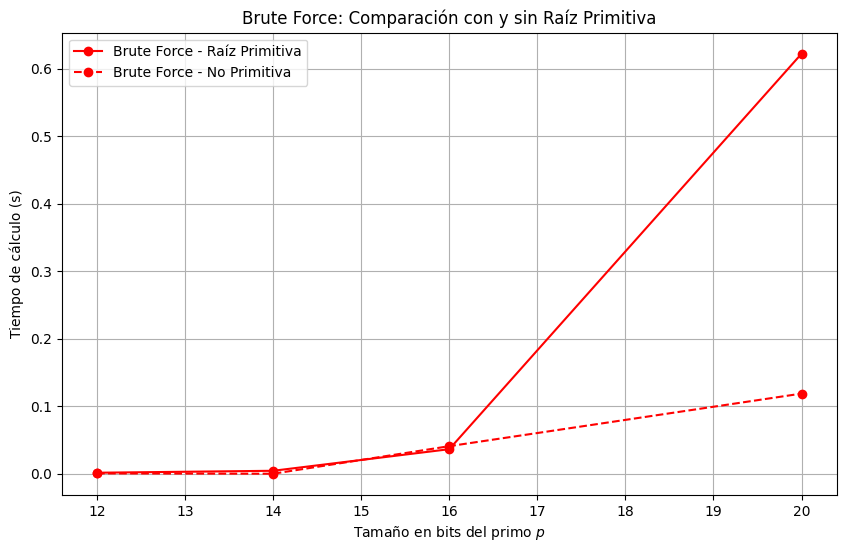

In [191]:
# Graficar la comparación de Brute Force con y sin raíz primitiva
plt.figure(figsize=(10, 6))
plt.plot(bit_sizes, times_bruteforce_primitive, marker='o', linestyle='-', color='red', label='Brute Force - Raíz Primitiva')
plt.plot(bit_sizes, times_bruteforce_non_primitive, marker='o', linestyle='--', color='red', label='Brute Force - No Primitiva')
plt.xlabel("Tamaño en bits del primo $p$")
plt.ylabel("Tiempo de cálculo (s)")
plt.title("Brute Force: Comparación con y sin Raíz Primitiva")
plt.grid(True)
plt.legend()
plt.show()

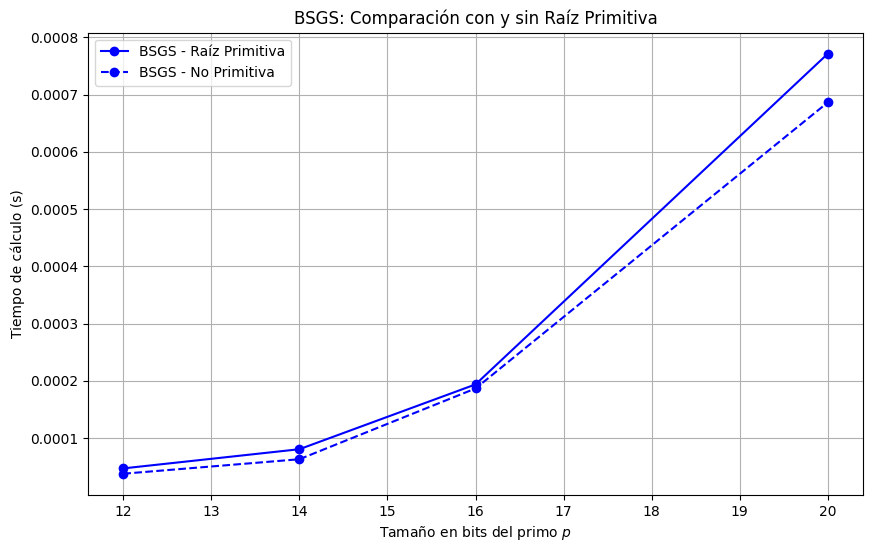

In [192]:
# Graficar la comparación de BSGS con y sin raíz primitiva
plt.figure(figsize=(10, 6))
plt.plot(bit_sizes, times_bsgs_primitive, marker='o', linestyle='-', color='blue', label='BSGS - Raíz Primitiva')
plt.plot(bit_sizes, times_bsgs_non_primitive, marker='o', linestyle='--', color='blue', label='BSGS - No Primitiva')
plt.xlabel("Tamaño en bits del primo $p$")
plt.ylabel("Tiempo de cálculo (s)")
plt.title("BSGS: Comparación con y sin Raíz Primitiva")
plt.grid(True)
plt.legend()
plt.show()

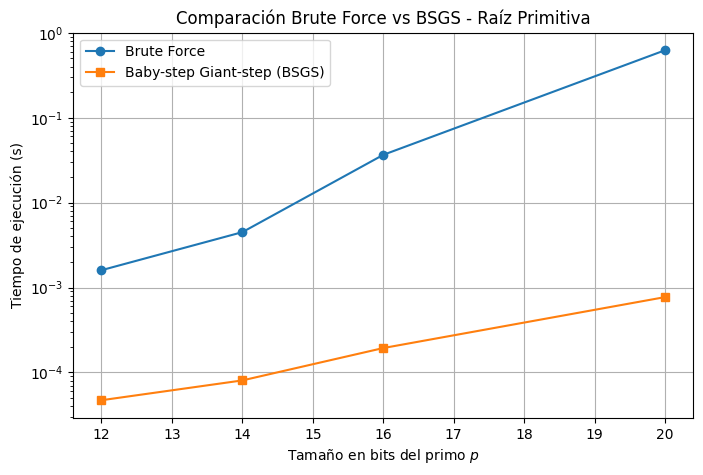

In [193]:
# Generar la gráfica
plt.figure(figsize=(8, 5))
plt.plot(bit_sizes, times_bruteforce_primitive, marker='o', linestyle='-', label='Brute Force')
plt.plot(bit_sizes, times_bsgs_primitive, marker='s', linestyle='-', label='Baby-step Giant-step (BSGS)')
plt.xlabel('Tamaño en bits del primo $p$')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Comparación Brute Force vs BSGS - Raíz Primitiva')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

**Conclusión y Recomendaciones.**

El uso de un **$\alpha$ seguro en DSA es fundamental para la seguridad de las firmas digitales**. Si $g$ no es primitiva, el tiempo de ataque se reduce considerablemente, permitiendo que un atacante recupere la clave privada con mayor facilidad.

Para mejorar la seguridad de la firma digital, la empresa **CBA** debe:
- **Verificar que cada $\alpha$ usado en la firma digital sea una raíz primitiva del módulo**.
- **Aumentar el tamaño de $p$** para incrementar la dificultad de los ataques.
- **Evitar la reutilización de $\alpha$**, ya que esto facilita ataques por recolección de firmas.
- **Implementar auditorías criptográficas** para evaluar periódicamente la seguridad de las claves de firma.

Si la empresa **no toma medidas inmediatas, sus firmas digitales seguirán siendo vulnerables a ataques**, lo que podría comprometer la autenticidad de documentos y generar problemas legales y financieros. Aplicar estas recomendaciones garantizará la seguridad del sistema y la confianza en sus transacciones digitales.